## Did WWII stop bright galactic novae?

There have been seven bright novae ($m \geq 2$) in the Galaxy since the year 1900, i.e., in the last 120 years. Six of those seven occurred before 1943. 

Some authors have claimed, to paraphrase, that it's weird that bright novae have stopped (Shafter, 2018). While the Galactic nova rate is highly uncertain due to unknown survey completeness, this primarily affects the low-brightness end of the nova distribution; our sample of bright novae is likely complete, because amateur astronomers are obsessed with them and bright novae are easy to see. Therefore, the sputtering out of bright novae is "real". 

But is it weird, or is this just how statistics do? More quantitatively, is this noval abandonment we're experiencing simply consistent with the average annual rate of bright supernovae?

### Novae since 1900
Noting only the year that the number of novae increased by one,

| \# years since 1900 | \# bright novae |
| ---                 | ---      |
| 1                   | 1        |
| 18                  | 2        |
| 20                  | 3        |
| 25                  | 4        |
| 34                  | 5        |
| 42                  | 6        |
| 75                  | 7        |

This is shown graphically below.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'number of bright novae')

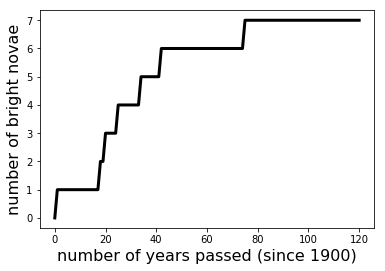

In [119]:
yrs = np.linspace(0,120,121)
N = np.repeat(np.arange(8),(1,17,2,5,9,8,33,46))
plt.plot(yrs,N,'k', lw=3)
plt.xlabel('number of years passed (since 1900)', size=16); 
plt.ylabel('number of bright novae', size=16)

As of right now, 120 years in, we still have 7 bright novae known, an average of about 6 per century. However, the hypothesis is that things got weird after 1943. The average rate through 1942 was $100\times6/42\approx14$ per century. Let's see if in either of these scenarios we've been abandoned by bright novae.

Assume that every year the probability of a bright nova occurring is 
$$
P = \frac{p}{100} ~.
$$
Then this is like a box with 100 tickets, $p$ of which have a "1" written on them and $(100 - p)$ have a "0". Every year we draw a ticket (replaced after the draw) and if it is a "1" we get a nova. 

The average value of the tickets in the box is 
$$
a = \frac{p\times1 + (100-p)\times0}{100} = \frac{p}{100} = P ~.
$$
The deviations of the tickets from this average are $(1-P)$ for the $p$ cards with "1" on them, and $-P$ for the $(100-p)$ cards with "0" on them, so the standard deviation is
$$
\sigma^2 = \frac{p(1-P)^2 + (100-p)(-P)^2}{100} = P(1-P)^2 + P^2 (1-p/100) = P(1-P)^2 + P^2 (1-P)
$$

Each year is a draw from the ticket box. In $T$ years, we expect a standard error
$$
SE = \sqrt{T\sigma^2}
$$
which characterizes how unlikely it is that the actual number of novae observed, $N$, deviates from the expected value $T\times P$. 

In [40]:
def draw_novae(T,p):
    P = p/100
    
    N_expect = T*P
    
    sig_sq = P*(1-P)**2 + P**2 *(1-P)
    err = np.sqrt(T*sig_sq)
    
    return N_expect, err

Text(0.5,1,'Bright novae have a random chance of occurring every year.')

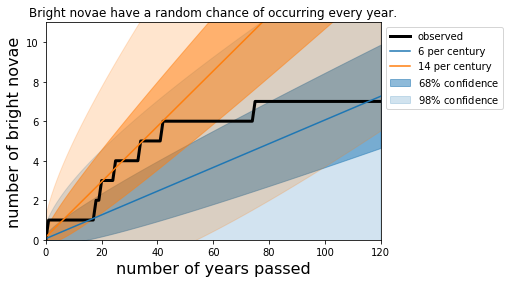

In [111]:
plt.plot(yrs, N, 'k', lw=3, label='observed')
for i, n_per_100 in enumerate((6,14)):
    N_ex, se = draw_novae(yrs+1, n_per_100)
    
    clr = f'C{i}'
    lbl = f'{n_per_100} per century'
    lbl2 = '$68\%$ confidence' if i==0 else ''
    lbl3 = '$98\%$ confidence' if i==0 else ''
    
    plt.fill_between(yrs, N_ex+  se, N_ex-  se, color=clr, alpha=0.5, label=lbl2)
    plt.fill_between(yrs, N_ex+3*se, N_ex-3*se, color=clr, alpha=0.2, label=lbl3)
    plt.plot(yrs, N_ex, color=clr, label=lbl)
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.xlim(yrs[0],yrs[-1])
plt.ylim(0,11)
plt.xlabel('number of years passed',size=16)
plt.ylabel('number of bright novae',size=16)
plt.title('Bright novae have a random chance of occurring every year.')

## Conclusion: It's not weird, stop saying that.

The likelihood is that the rate of bright novae is even less than 14 per century, and that the first half of the 20-th century was a little spurt of "good luck." Maybe the Universe just wanted astronomers to study novae, so it turned out a bunch just when optical astronomy was heating up. Maybe there was a theorist in 1900 talking about novae and the Universe wanted to throw them a bone, like it did for Dan Kasen with the NS-NS merger. My guess is it was a combination of these two factors.

### When it is mathematically legal to start publicly worrying?

2095.0
2250.0


Text(0.5,1,'Timeline for legitimizing a freak-out over the bright nova rate')

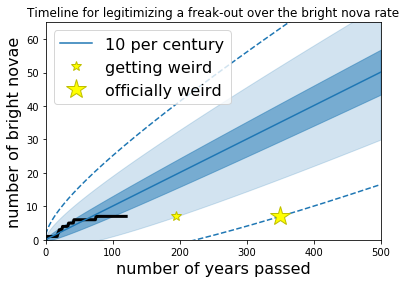

In [115]:
plt.plot(yrs, N, 'k', lw=3)

# Simulate to some distant timeframe with a decent approximation of the rate
yrs2 = np.linspace(0,500,501)
N_ex, se = draw_novae(yrs2+1, 10)

# Plot average, 1-, 3-, and 5- "sigma" envelopes
clr='C0'
plt.fill_between(yrs2, N_ex+  se, N_ex-  se, color=clr, alpha=0.5)
plt.fill_between(yrs2, N_ex+3*se, N_ex-3*se, color=clr, alpha=0.2)
plt.plot(yrs2, N_ex+5*se, color=clr, ls='--')
plt.plot(yrs2, N_ex-5*se, color=clr, ls='--')
plt.plot(yrs2, N_ex, color=clr, label='10 per century')

# Year of 95% weirdness
N_now = 7
officially_weird = np.argmin(abs((N_ex-3*se) - N_now))
print(1900+yrs2[officially_weird])
plt.plot(yrs2[officially_weird], N_now, '*', label='getting weird',
         mfc='yellow', mec='y', ms=10, zorder=10)
# Year of 99.99994% weirdness
officially_weird = np.argmin(abs((N_ex-5*se) - N_now))
print(1900+yrs2[officially_weird])
plt.plot(yrs2[officially_weird], N_now, '*', label='officially weird',
         mfc='yellow', mec='y', ms=20, zorder=10)


plt.legend(loc='upper left', fontsize=16)

plt.xlim(yrs2[0],yrs2[-1])
plt.ylim(0,65)
plt.xlabel('number of years passed',size=16)
plt.ylabel('number of bright novae',size=16)
plt.title('Timeline for legitimizing a freak-out over the bright nova rate')

## A comparison to the analysis of Shafter (2018) 

Shafter (2018) analyzed the bright nova rate in the following way.

They use the binomial formula, which gives the probability $P$ of $N$ or fewer successes out of $M$ trials as
$$
P(\leq N | M) = \sum_{k=0}^{N} \frac{M!}{k!(M-k)!} 0.5^M ,
$$
where here it has been already assumed that the probability of success in a given trial is 50\%. (They initially invoke this formula to discuss whether the distribution of novae between hemispheres is strange, hence the 50\% assumption.)

They then discuss the distribution of novae between the _years_ to assess whether bright novae have likely been missed. They note that in their 116-year period, 6 of the 7 novae were discovered in the first half (first 58 years). The justification for using the binomial formula as stated above for this problem is roughly as follows: Look, I said "half," again! The text actually states, 
> We can compute the significance of this result by computing the probability that $N$ or fewer novae with $m \leq 2$ would be found within any consecutive 58 year span in the 116 years since 1900. That probability is given  by equation (1), where $M-1$ novae must erupt within the same 58 year window. In this case, where $N=1$, we find $P = 6\times0.5^6$ (one nova) + $0.5^6$ (no novae) $= 0.11$.

I don't know how to make sense of their calculation; is it correct logic, or not? I feel like it isn't a method that's intrinsically tied to the bright nova rate. It's more about the likelihood that the novae are distributed in time the way they are; but if novae are a chaotic/random process, then, the number "seven" really has no intrinsic meaning, and I think _that_ is my issue with the analysis.